<a href="https://colab.research.google.com/github/jouini-azi/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [7]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [8]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

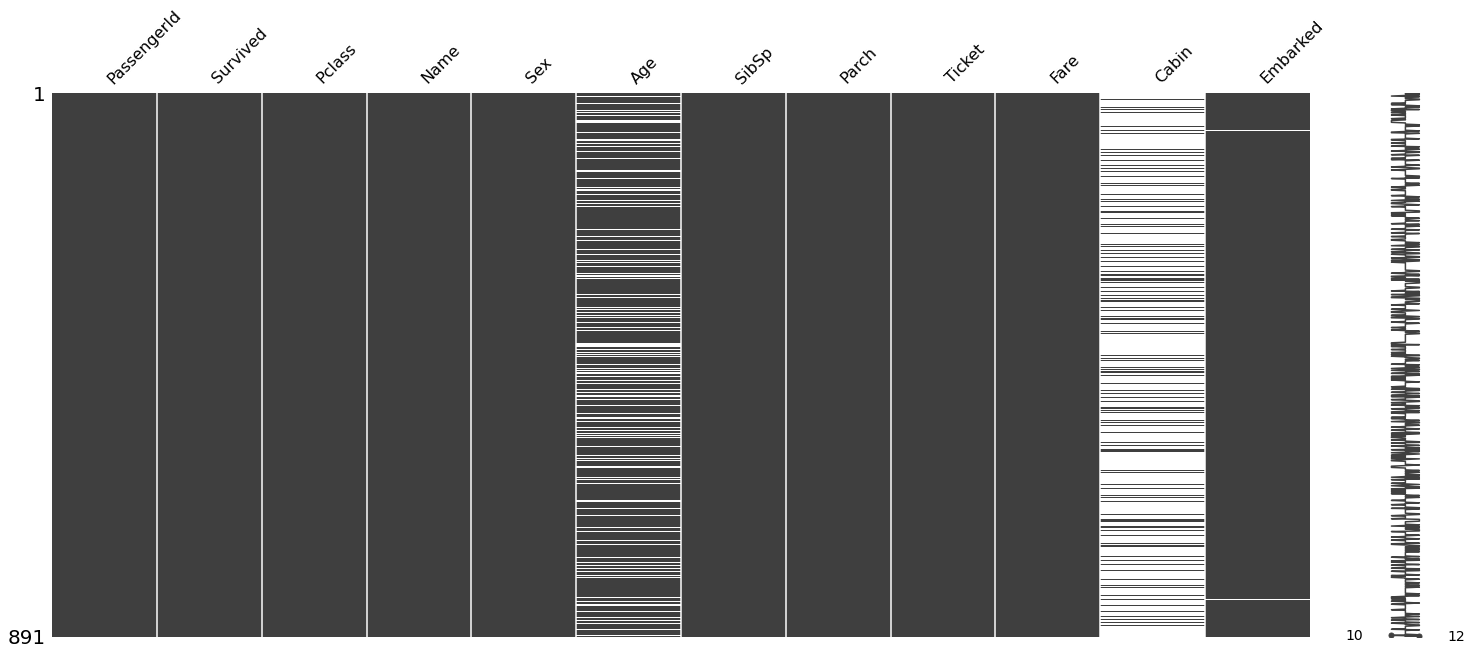

In [9]:
mis.matrix(train)

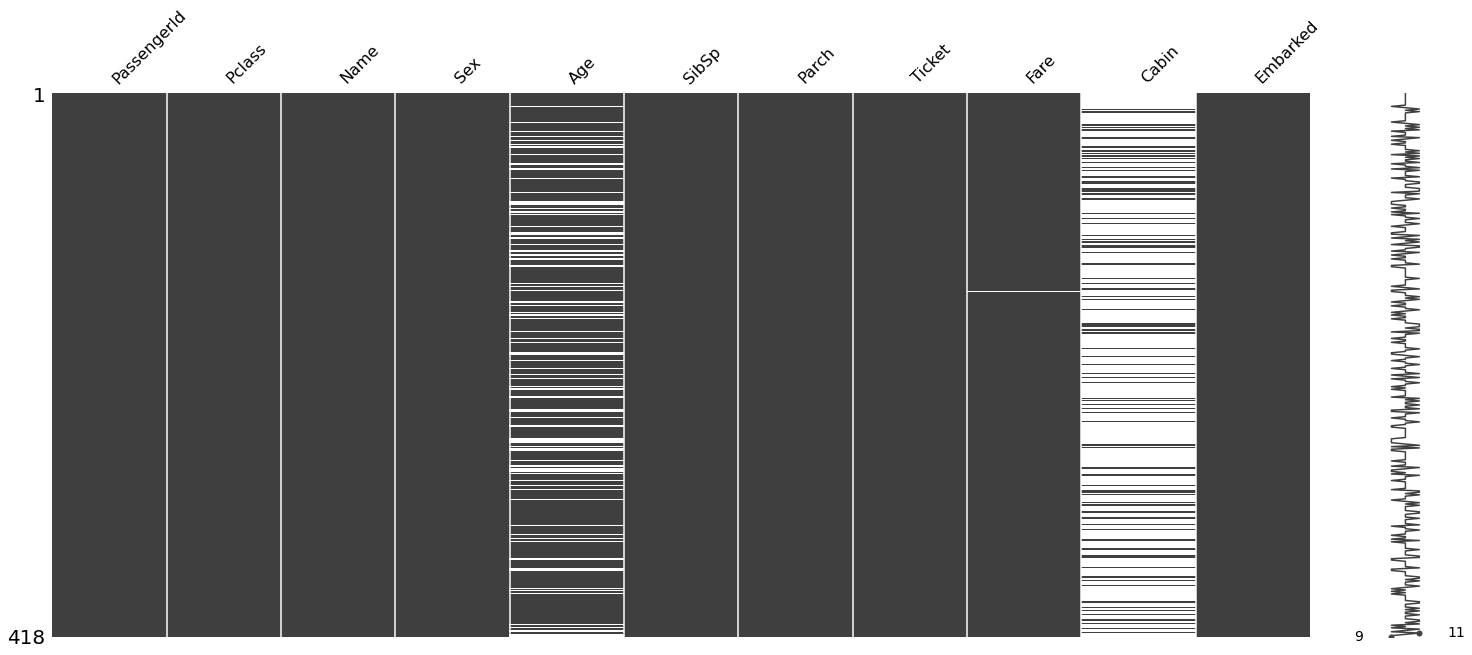

In [10]:
mis.matrix(test)

In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
train.groupby(['Sex' , 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


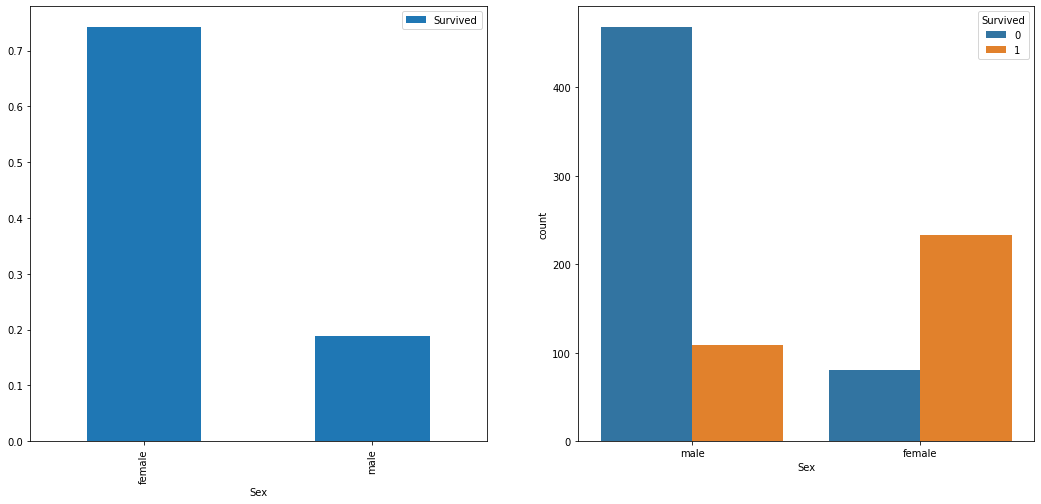

In [14]:
f , ax = plt.subplots(1 , 2 ,figsize = (18 ,8))
train[['Sex' , 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
sns.countplot('Sex' , hue = 'Survived' , data = train , ax = ax[1])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


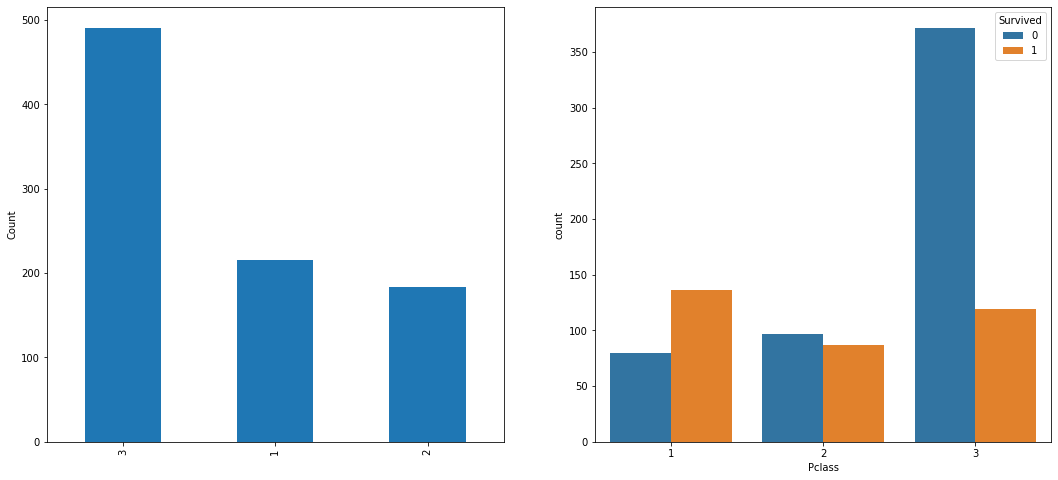

In [15]:
f , ax  = plt.subplots(1 , 2 , figsize = (18 , 8))
train['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_ylabel('Count')
sns.countplot('Pclass' , hue = 'Survived' , data = train , ax = ax[1])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


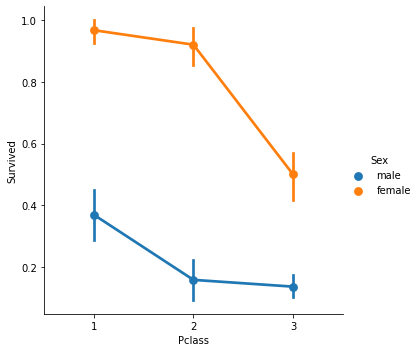

In [16]:
sns.factorplot('Pclass' , 'Survived' , hue = 'Sex' , data = train)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


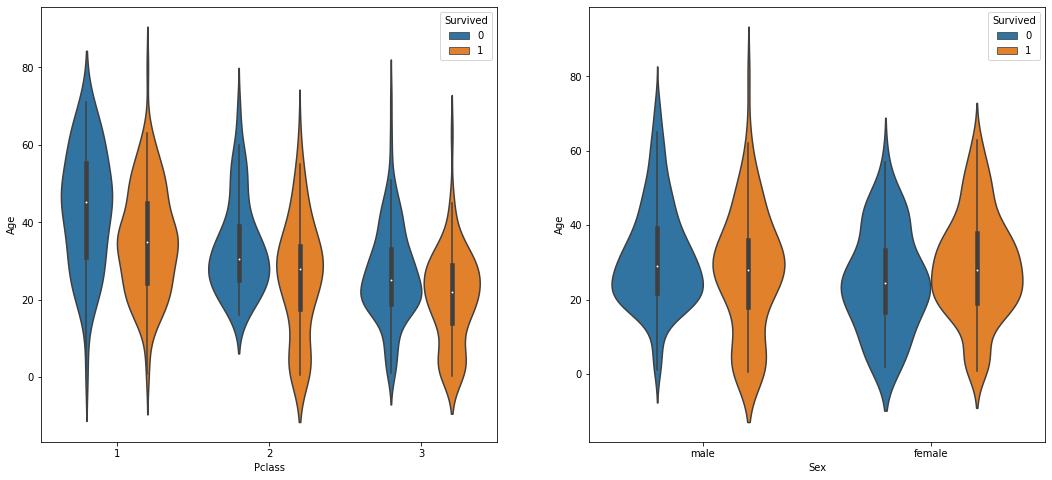

In [17]:
f , ax = plt.subplots(1 , 2 , figsize =(18 , 8))
sns.violinplot("Pclass" , "Age" , hue = "Survived" , data = train , ax = ax[0])
sns.violinplot("Sex" , "Age" , hue = "Survived" , data = train , ax = ax[1])
plt.show()

In [18]:
train['Name']=train['Name'].str.extract('([A-Za-z]+)\.')

In [19]:
test['Name']=test['Name'].str.extract('([A-Za-z]+)\.')

In [20]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr,male,26.0,0,0,111369,30.0000,C148,C


In [21]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


In [22]:
train['Name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64

In [23]:
t=train['Name'].value_counts()[4:]

In [24]:
t

Dr          7
Rev         6
Mlle        2
Major       2
Col         2
Countess    1
Capt        1
Ms          1
Sir         1
Lady        1
Mme         1
Don         1
Jonkheer    1
Name: Name, dtype: int64

In [25]:
t_test = test['Name'].value_counts()[4:]

In [26]:
t_test

Col     2
Rev     2
Ms      1
Dr      1
Dona    1
Name: Name, dtype: int64

In [27]:
train['Name'].replace(t.index , 'Other' , inplace = True)
test['Name'].replace(t_test.index , 'Other' , inplace = True)

In [28]:
train.groupby('Name')['Age'].mean()

Name
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
Other     42.384615
Name: Age, dtype: float64

In [29]:
test.groupby('Name')['Age'].mean()

Name
Master     7.406471
Miss      21.774844
Mr        32.000000
Mrs       38.903226
Other     43.833333
Name: Age, dtype: float64

In [30]:
train.loc[train['Age'].isnull() & (train['Name'] == 'Master') , 'Age'] = 4.57
train.loc[train['Age'].isnull() & (train['Name'] == 'Miss') , 'Age'] = 21.77
train.loc[train['Age'].isnull() & (train['Name'] == 'Mr') , 'Age'] = 32.3
train.loc[train['Age'].isnull() & (train['Name'] == 'Mrs') , 'Age'] = 35.3
train.loc[train['Age'].isnull() & (train['Name'] == 'Other') , 'Age'] = 42.3

In [31]:
test.loc[test['Age'].isnull() & (test['Name'] == 'Master') , 'Age'] = 4.57
test.loc[test['Age'].isnull() & (test['Name'] == 'Miss') , 'Age'] = 21.77
test.loc[test['Age'].isnull() & (test['Name'] == 'Mr') , 'Age'] = 32.3
test.loc[test['Age'].isnull() & (test['Name'] == 'Mrs') , 'Age'] = 35.3
test.loc[test['Age'].isnull() & (test['Name'] == 'Other') , 'Age'] = 42.3

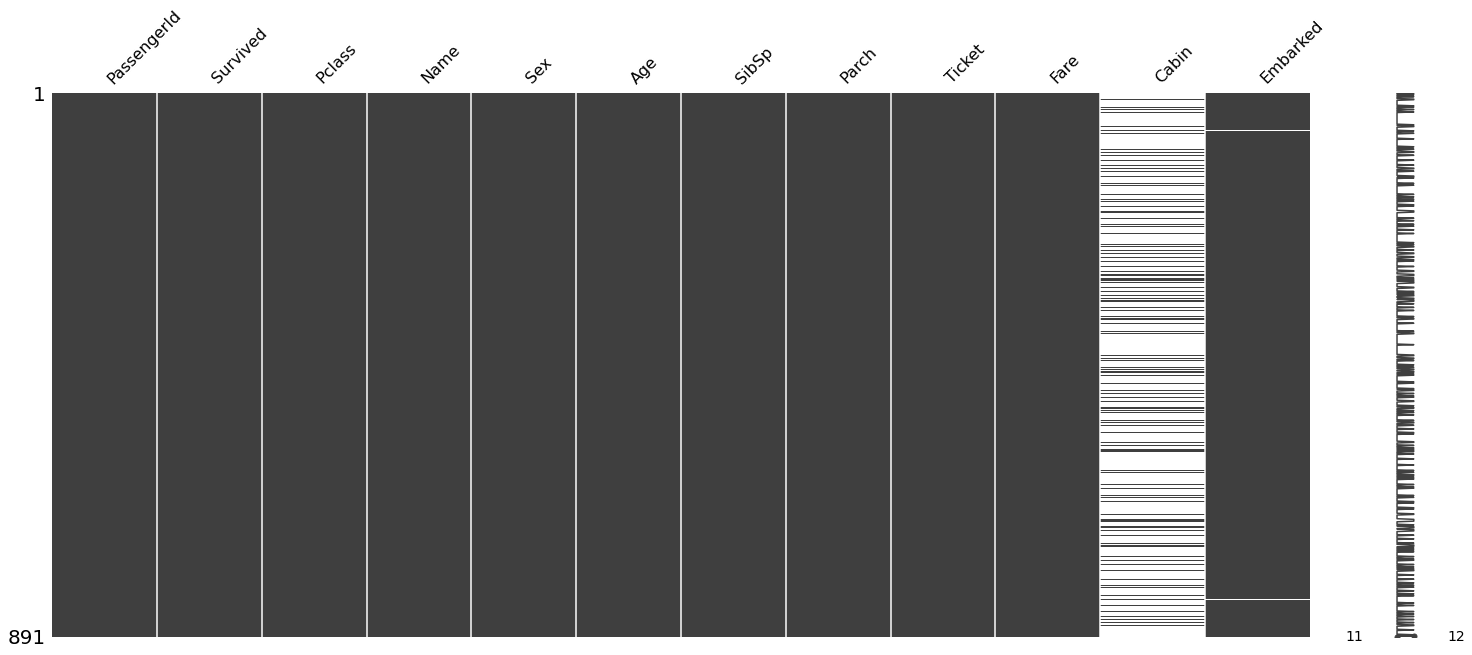

In [32]:
mis.matrix(train)

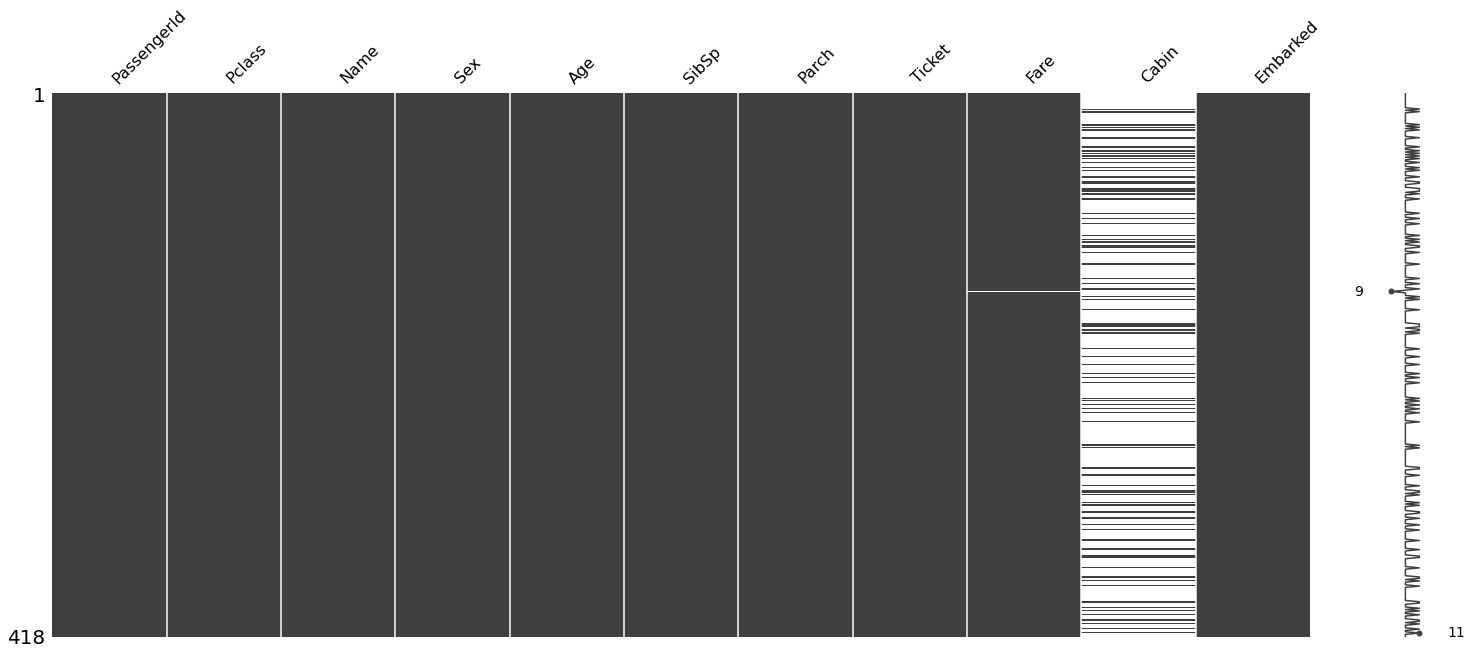

In [33]:
mis.matrix(test)

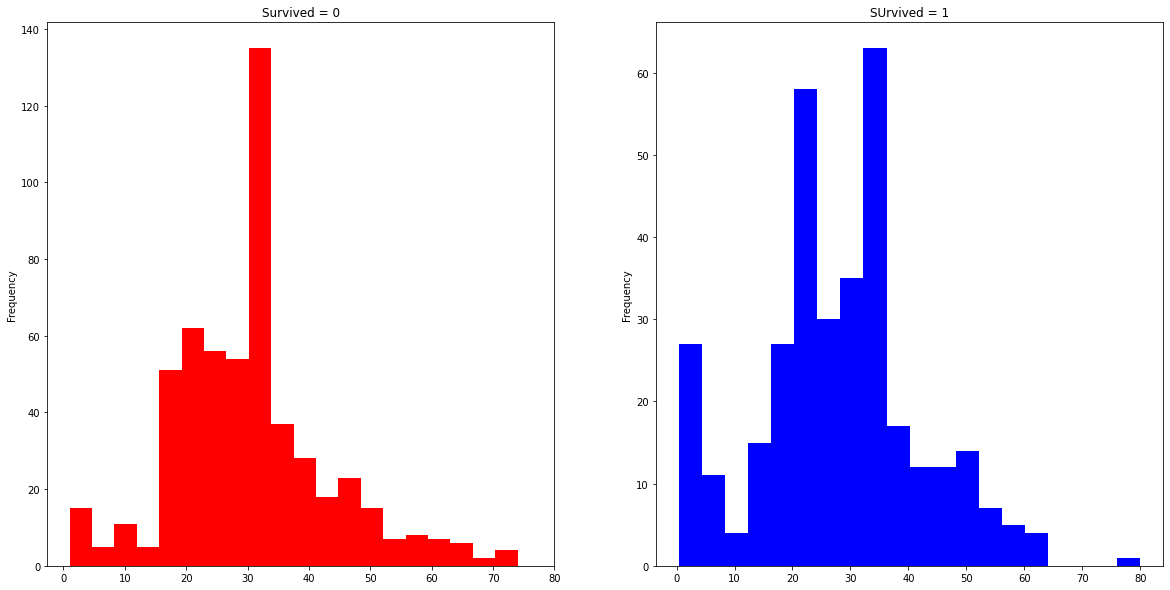

In [34]:
f , ax = plt.subplots(1 ,2 , figsize = (20,10))
train[train['Survived']== 0].Age.plot.hist(ax = ax [0] , bins = 20 , color = 'red')
ax[0].set_title("Survived = 0")
x0 = list(range(0,90,10))
ax[0].set_xticks(x0)
train[train['Survived']==1]['Age'].plot.hist(ax = ax[1] , bins = 20 , color = 'blue')
ax[1].set_title("SUrvived = 1")
x0 = list(range(0,90,10))
ax[1].set_xticks(x0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


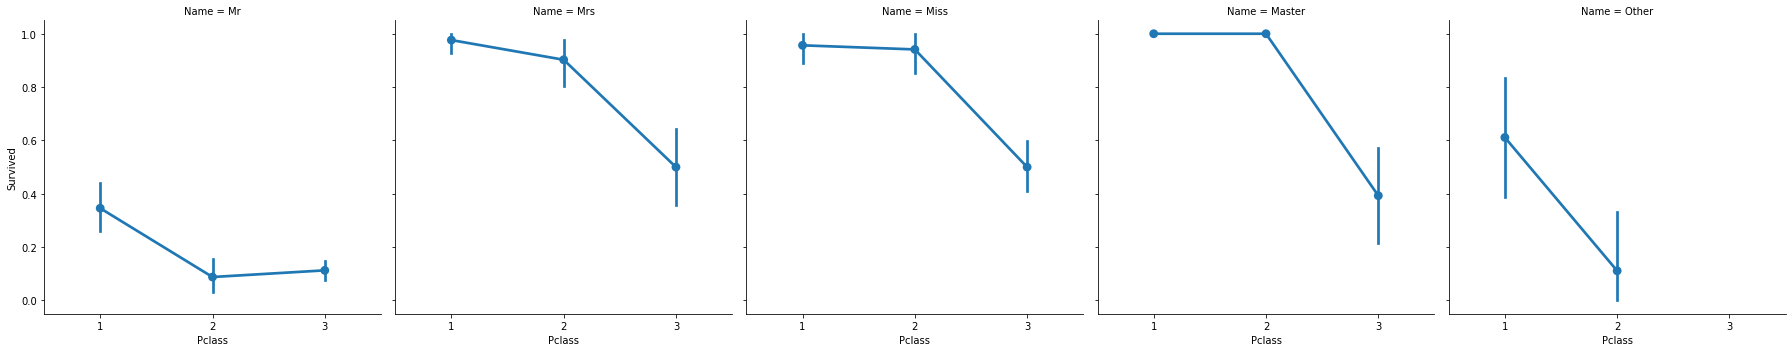

In [35]:
sns.factorplot('Pclass' , 'Survived', col = 'Name' , data = train)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


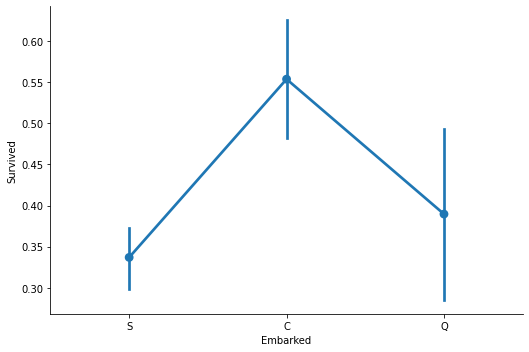

In [36]:
#the chance for port C is highest around 0.55
sns.factorplot('Embarked' , 'Survived' , data =train)
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 1.0, ' Embarked vs Pclass')

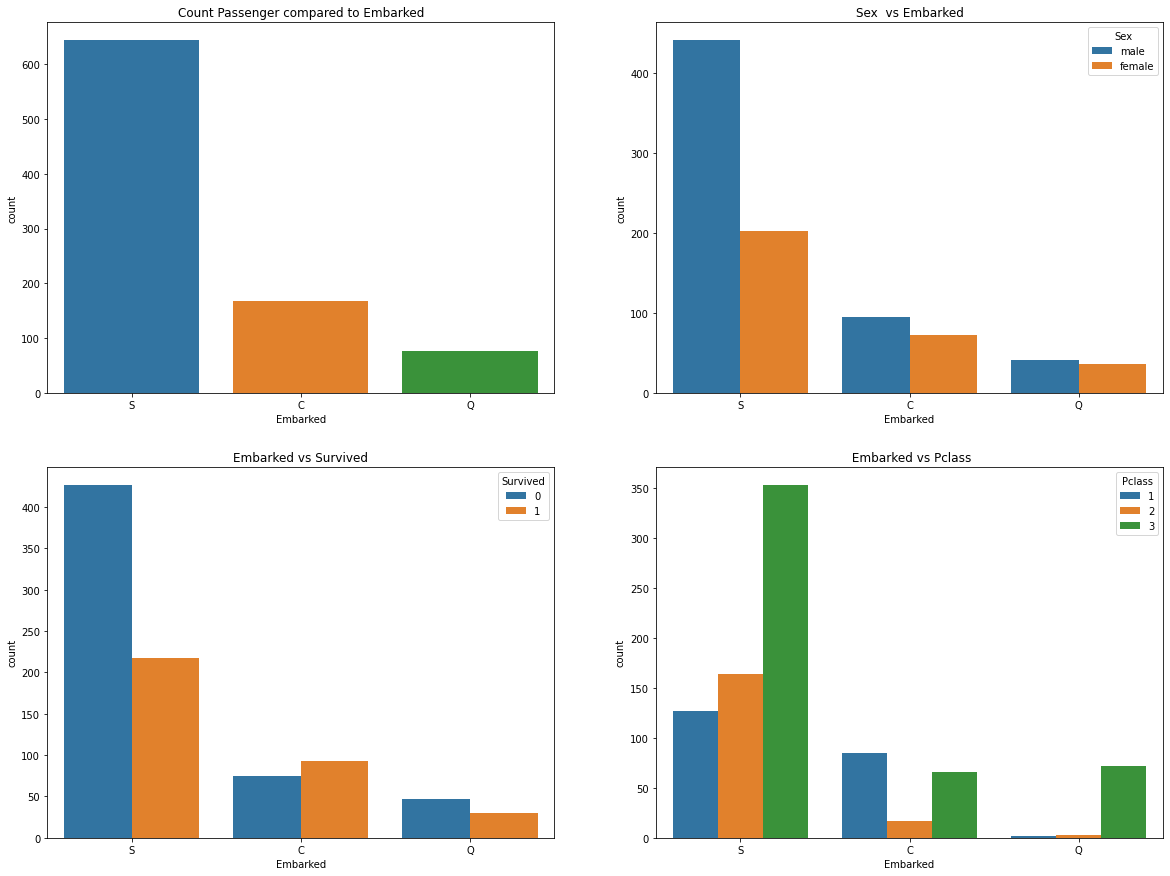

In [37]:
f , ax = plt.subplots(2 , 2 , figsize=(20, 15))
sns.countplot('Embarked' , data = train , ax= ax[0 ,0 ])
ax[0 , 0 ].set_title('Count Passenger compared to Embarked')
sns.countplot('Embarked' , hue = 'Sex' , data = train , ax = ax[0 ,1])
ax[0 ,1].set_title('Sex  vs Embarked')
sns.countplot('Embarked' , hue='Survived' , data = train , ax = ax[1,0])
ax[1 ,0 ].set_title('Embarked vs Survived')
sns.countplot('Embarked' , hue='Pclass' , data = train , ax= ax[1,1])
ax[1 ,1].set_title(' Embarked vs Pclass')

In [38]:
train['Embarked'].mode()

0    S
dtype: object

In [39]:
train['Embarked'].fillna('S' , inplace = True)

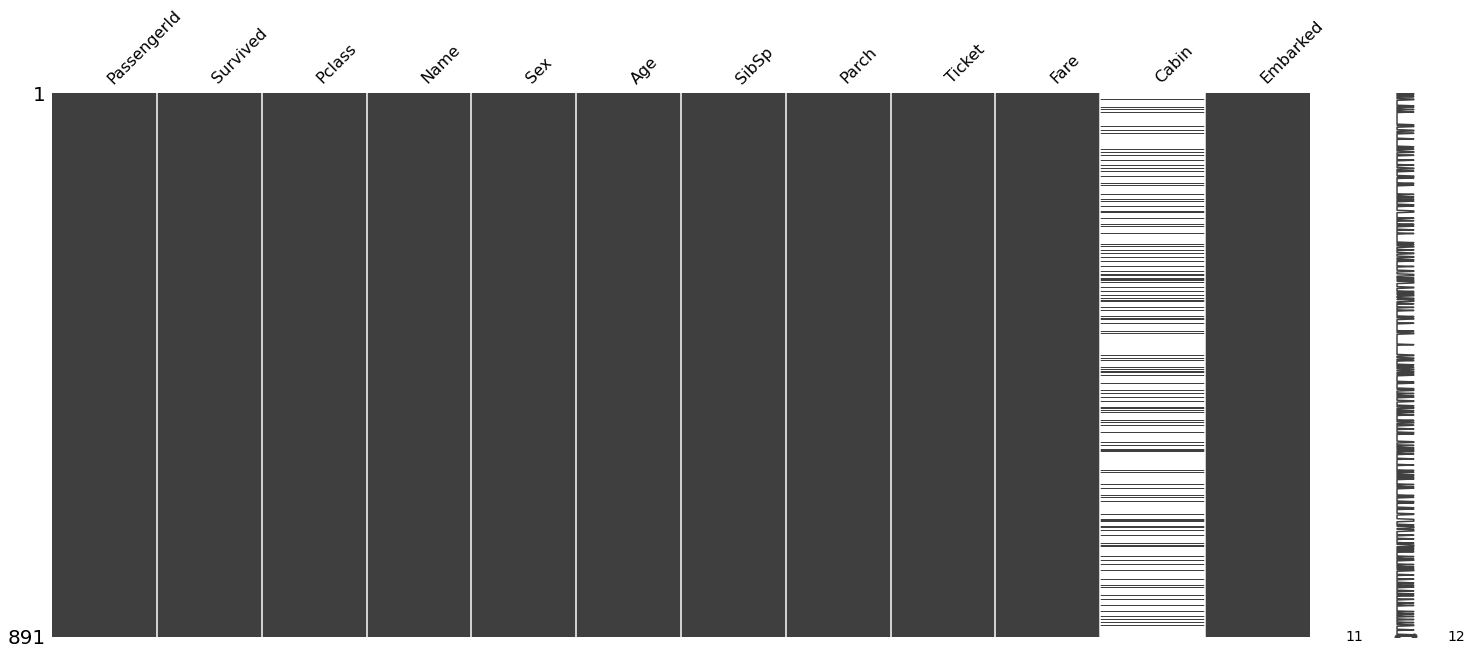

In [40]:
mis.matrix(train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SibSp vs Survived')

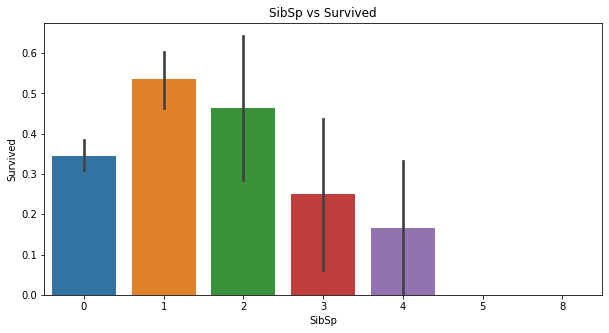

In [41]:
plt.figure(figsize = (10,5))
sns.barplot('SibSp' , 'Survived',data = train)
plt.title('SibSp vs Survived')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Parch vs Survived')

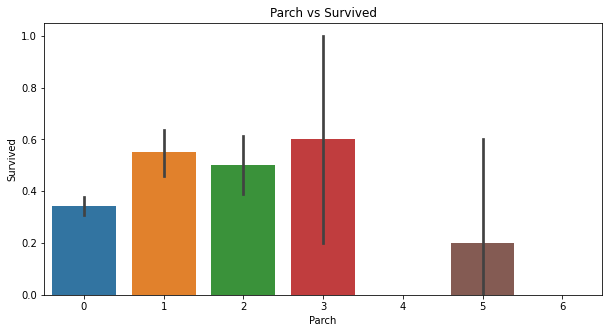

In [42]:
plt.figure(figsize = (10, 5))
sns.barplot('Parch' , 'Survived' , data = train)
plt.title('Parch vs Survived')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

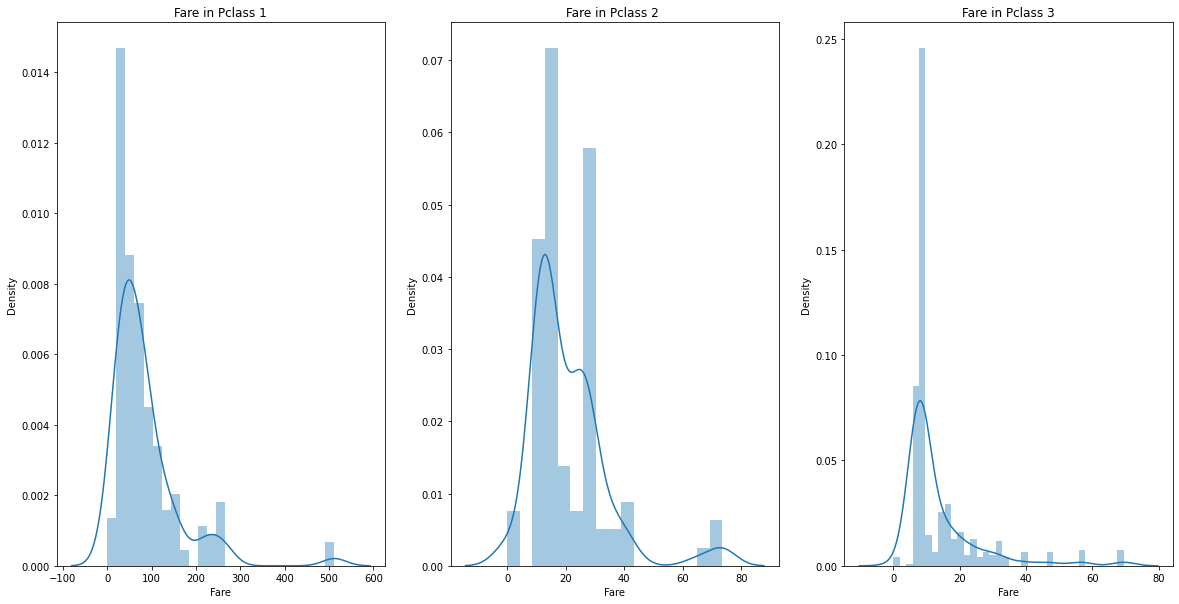

In [43]:
#Fare
f , ax = plt.subplots(1,3 , figsize = (20 ,10))
sns.distplot(train[train['Pclass']==1]['Fare'] , ax = ax[0])
ax[0].set_title('Fare in Pclass 1')
sns.distplot(train[train['Pclass']==2]['Fare'] , ax=ax[1])
ax[1].set_title('Fare in Pclass 2 ')
sns.distplot(train[train['Pclass']==3]['Fare'] , ax = ax[2])
ax[2].set_title('Fare in Pclass 3')
plt.show()

##Sex : women have more chance to survive
##Pclass : 1st -> 2st -> 3st
##Age : Children <10 do have the high chance of survival
##Embarked : the chance of survival C is better than S and Q
##SibSp : 1-2 siblings has more chance to survive
##Parch : 1-3 have more chance to survive

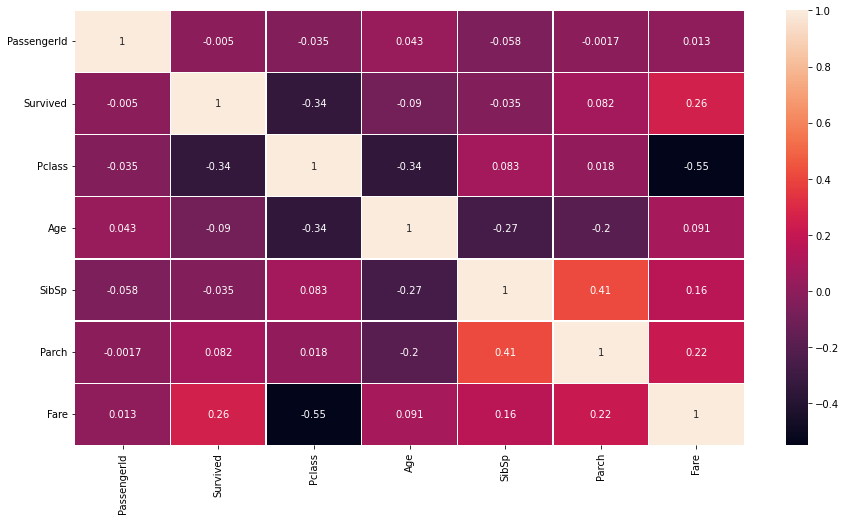

In [44]:
#Correlation Between The features
sns.heatmap(train.corr() , annot = True , linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(15 , 8)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplo

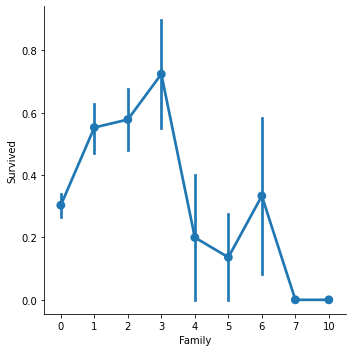

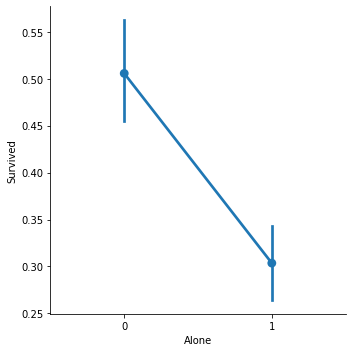

In [45]:
train['Family'] = train['Parch'] + train['SibSp']
train['Alone']=0
train.loc[train['Family']==0 , 'Alone'] = 1
f , ax = plt.subplots(1 ,2 )
sns.factorplot('Family' , 'Survived' , data = train , ax = ax[0])
ax[0].set_title('Family')
sns.factorplot('Alone' , 'Survived' , data = train , ax = ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(0)
plt.close(1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


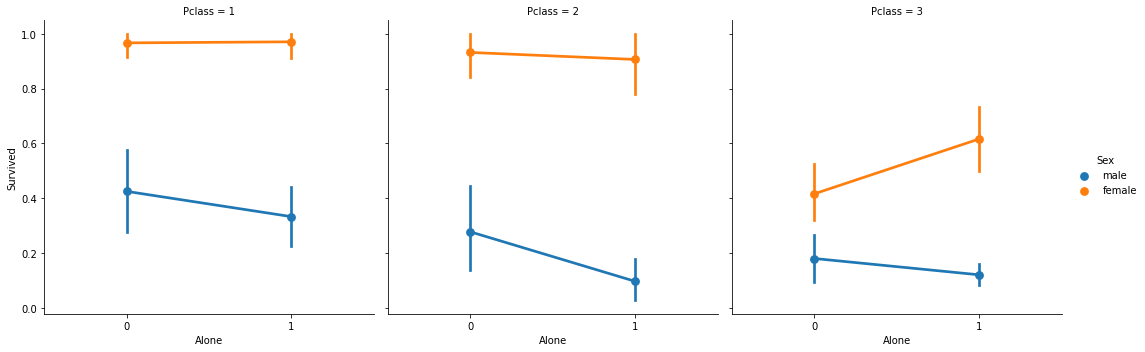

In [46]:
sns.factorplot('Alone' , 'Survived' , hue = 'Sex' , col = 'Pclass' , data = train)
plt.show()

In [47]:
train.loc[train['Age']<=16 , 'Age']=0
train.loc[(train['Age']>16) & (train['Age']<=32) , 'Age'] = 1
train.loc[(train['Age']>32) & (train['Age']<=48) , 'Age'] = 2
train.loc[(train['Age']>48) & (train['Age']<=64) , 'Age'] = 3
train.loc[train['Age']>64 , 'Age'] = 4

In [48]:
test.loc[test['Age']<=16 , 'Age']=0
test.loc[(test['Age']>16) & (test['Age']<=32) , 'Age'] = 1
test.loc[(test['Age']>32) & (test['Age']<=48) , 'Age'] = 2
test.loc[(test['Age']>48) & (test['Age']<=64) , 'Age'] = 3
test.loc[test['Age']>64 , 'Age'] = 4

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone
0,1,0,3,Mr,male,1.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,Mrs,female,2.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,Miss,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,Mrs,female,2.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,Mr,male,2.0,0,0,373450,8.0500,NaN,S,0,1


In [50]:
train['Age'].value_counts()

1.0    382
2.0    325
0.0    104
3.0     69
4.0     11
Name: Age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


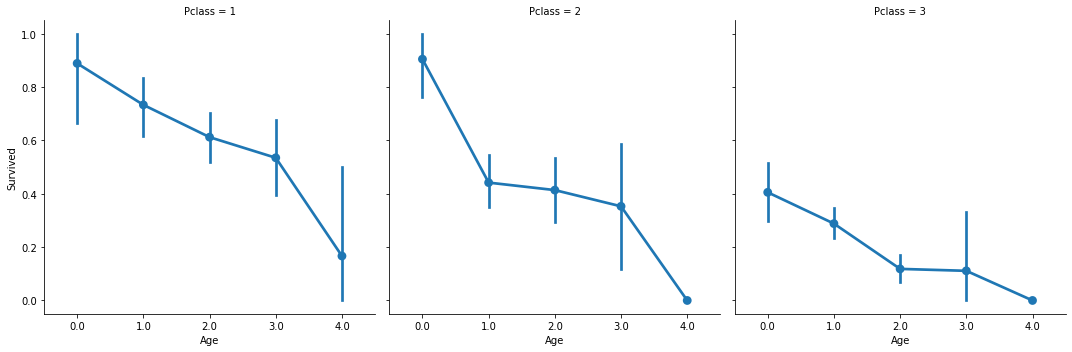

In [51]:
sns.factorplot('Age' , 'Survived' , data = train , col = 'Pclass')

In [52]:
train['Fare_Range']=pd.qcut(train['Fare'] , 4)
train.groupby(['Fare_Range'])['Survived'].mean()

Fare_Range
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [53]:
train['Fare_cat']=0
train.loc[train['Fare']<=7.91 , 'Fare_cat'] = 0
train.loc[(train['Fare']>7.91) & (train['Fare'] <= 14.454) , 'Fare_cat'] = 1
train.loc[(train['Fare']>14.454) &(train['Fare']<=31), 'Fare_cat'] = 2
train.loc[(test['Fare']>31 ) &(train['Fare']<=513), 'Fare_cat'] = 3

In [54]:
test.loc[test['Fare']<=7.91 , 'Fare_cat'] = 0
test.loc[(test['Fare']>7.91) & (test['Fare'] <= 14.454) , 'Fare_cat'] = 1
test.loc[(test['Fare']>14.454) &(test['Fare']<31), 'Fare_cat'] = 2
test.loc[(test['Fare']>31 ) &(test['Fare']<=513), 'Fare_cat'] = 3

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


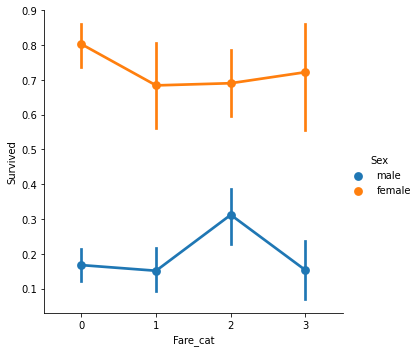

In [55]:
sns.factorplot('Fare_cat' , 'Survived' , data = train , hue = 'Sex')
plt.show()

In [56]:
train.drop(columns=['Cabin'] , inplace = True)

In [57]:
lb = LabelEncoder()

In [58]:
for col in train.select_dtypes('O'):
  train[col] = lb.fit_transform(train[col])

In [59]:
for col in test.select_dtypes('O'):
  test[col] = lb.fit_transform(test[col])

In [60]:
train.drop(columns = ['Ticket' , 'Fare_Range' , 'PassengerId'] , inplace =True)
test.drop(columns = ['Ticket'] , inplace =True)

In [61]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone,Fare_cat
0,0,3,2,1,1.0,1,0,7.2500,2,1,0,0
1,1,1,3,0,2.0,1,0,71.2833,0,1,0,0
2,1,3,1,0,1.0,0,0,7.9250,2,0,1,1
3,1,1,3,0,2.0,1,0,53.1000,2,1,0,0
4,0,3,2,1,2.0,0,0,8.0500,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,4,1,1.0,0,0,13.0000,2,0,1,1
887,1,1,1,0,1.0,0,0,30.0000,2,0,1,2
888,0,3,1,0,1.0,1,2,23.4500,2,3,0,2
889,1,1,2,1,1.0,0,0,30.0000,0,0,1,2


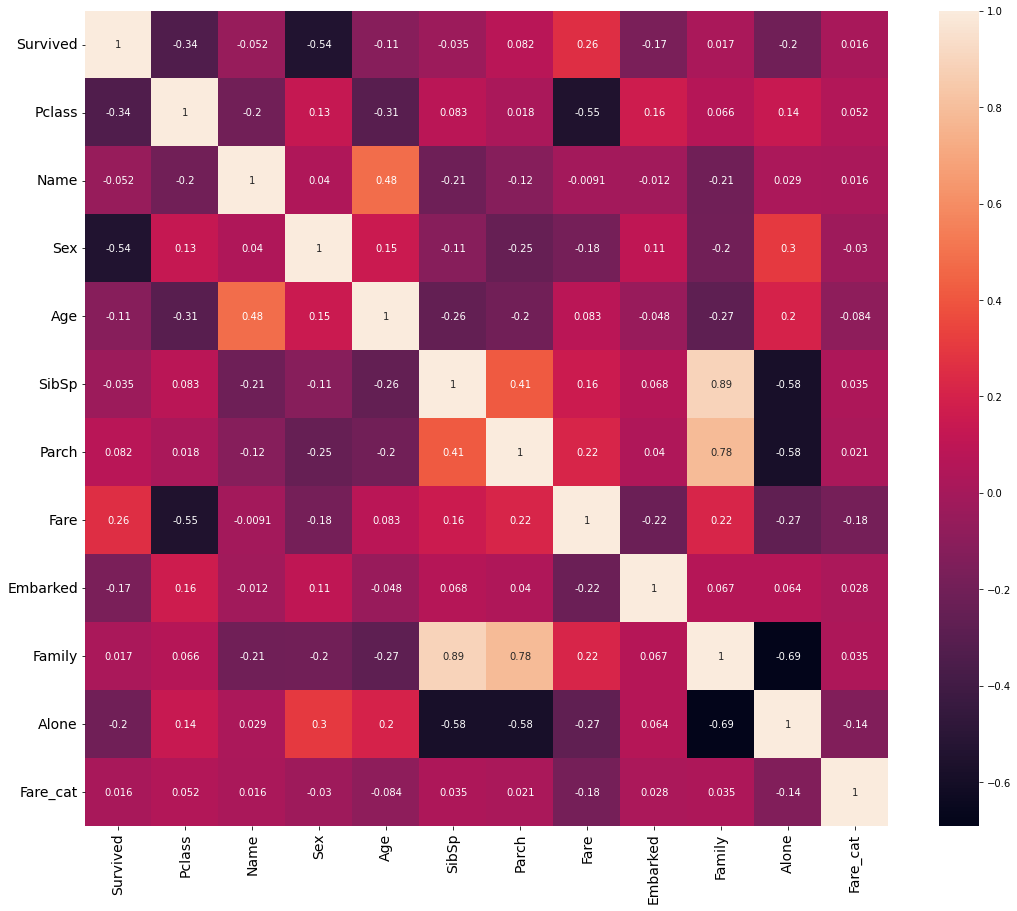

In [62]:
sns.heatmap(train.corr() , annot = True)
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [64]:
x_train , x_test , y_train , y_test = train_test_split(train.drop(columns=['Survived']) , train['Survived'] , test_size = 0.25  , random_state = 19)

##Radia Support Vector Machines (rbf-SVM)

In [65]:
model = svm.SVC(kernel = 'rbf' , C=1 , gamma = 0.1)
model.fit(x_train , y_train)
print('training :',model.score(x_train , y_train))
print('testing :',model.score(x_test , y_test))

training : 0.8607784431137725
testing : 0.8161434977578476


##Linear Support Vector Machine(linear-SVM)

In [66]:
model = svm.SVC(kernel = 'linear' , C=0.1 , gamma = 0.1)
model.fit(x_train , y_train)
print('training :',model.score(x_train , y_train))
print('testing :',model.score(x_test , y_test))

training : 0.781437125748503
testing : 0.820627802690583


##Logistic Regression




In [67]:
model = LogisticRegression()
model.fit(x_train , y_train)
print('training :',model.score(x_train , y_train))
print('testing :',model.score(x_test , y_test))

training : 0.8083832335329342
testing : 0.820627802690583


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##Decision Tree

In [68]:
model =DecisionTreeClassifier()
model.fit(x_train , y_train)
print('training :',model.score(x_train , y_train))
print('testing :',model.score(x_test , y_test))

training : 0.9550898203592815
testing : 0.8295964125560538


In [69]:
model = KNeighborsClassifier()
model.fit(x_train , y_train)
print('training :',model.score(x_train , y_train))
print('testing :',model.score(x_test , y_test))

training : 0.8158682634730539
testing : 0.7623318385650224


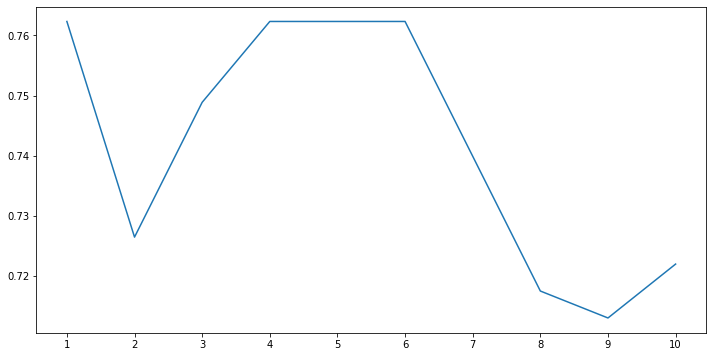

In [70]:
a = list(range(1,11))
df = []
for i in list(range(1,11)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train , y_train)
  df.append(model.score(x_test , y_test))
b = [1,2,3,4,5,6,7,8,9,10]
plt.plot(a , df)
plt.xticks(b)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [71]:
model = GaussianNB()
model.fit(x_train , y_train)
print('training :',model.score(x_train , y_train))
print('testing :',model.score(x_test , y_test))

training : 0.7904191616766467
testing : 0.8026905829596412


In [72]:
model = RandomForestClassifier()
model.fit(x_train , y_train)
print('training :',model.score(x_train , y_train))
print('testing :',model.score(x_test , y_test))

training : 0.9550898203592815
testing : 0.8071748878923767


##Cross Validation

In [73]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,x_train,y_train, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,CV Mean,Std
Linear Svm,0.781569,0.044882
Radial Svm,0.676572,0.050514
Logistic Regression,0.793532,0.058194
KNN,0.733582,0.036686
Decision Tree,0.768159,0.050855
Naive Bayes,0.784532,0.051202
Random Forest,0.792040,0.043580


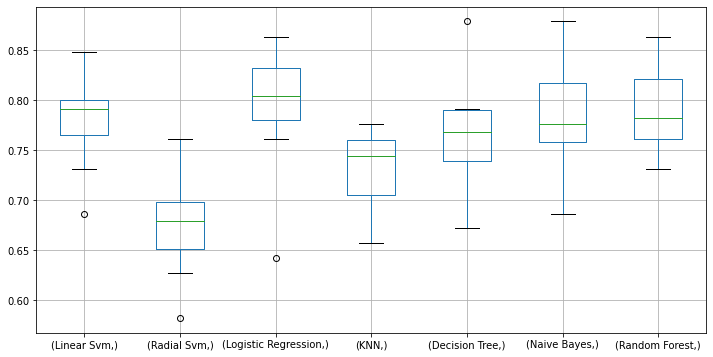

In [74]:
plt.subplots(figsize = (12 , 6))
box = pd.DataFrame(accuracy , index = [classifiers])
box.T.boxplot()

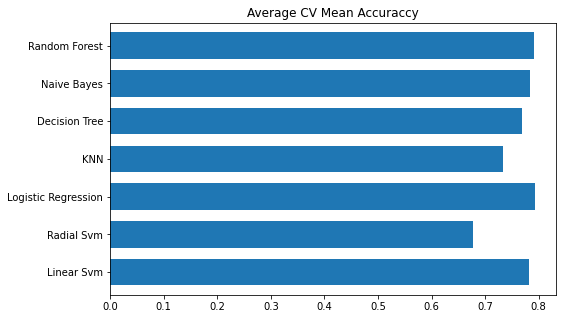

In [75]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.7)
plt.title('Average CV Mean Accuraccy')
fig = plt.gcf()
fig.set_size_inches(8 , 5)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


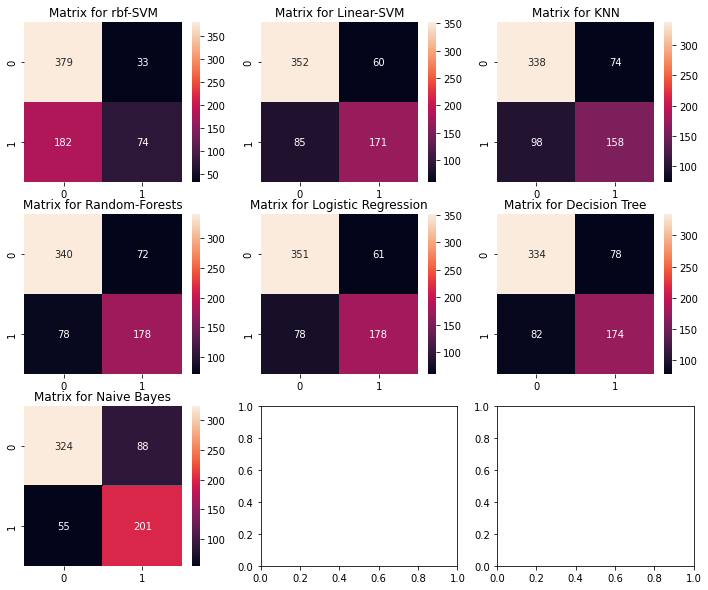

In [76]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

###Hyper-Parameters

##SVM


In [78]:
from sklearn.model_selection import GridSearchCV
C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

kernel = ["rbf" ,  "linear"]
hyper =  {"kernel":kernel , "C":C , "gamma":gamma}
gd = GridSearchCV(estimator = svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(x_train , y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 264 candidates, totalling 1320 fits
0.7844798563573111
SVC(C=0.4, gamma=0.05, kernel='linear')


##RandomForestClassifier

In [ ]:
n_estimators = range(100 ,1000 ,100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=19),param_grid=hyper ,verbose = True)
gd.fit(x_train , y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


###Bagging

##Bagged KNN
bagging works best with models with high variance.An example is Decession Tree Classifier Or RandomForestCLassifier Or we can use KNN with small value n_neighbours

In [87]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,y_test))

The accuracy for bagged KNN is: 0.7533632286995515


In [90]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,y_test))

The accuracy for bagged Decision Tree is: 0.8475336322869955


###Boosting
AdaBoost(Adaptive Boosting)

In [91]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 200 , random_state = 19 , learning_rate = 0.1)
result = cross_val_score(ada , x_train , y_train , cv =10 , scoring = 'accuracy')
print('the cross validated score for adaBoost is:' , result.mean())

the cross validated score for adaBoost is: 0.8159882406151062



##Stochastic Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators= 500 , random_state = 19 , learning_rate =0.1)
result = cross_val_score(grad , x_train , y_train , cv = 10 , scoring = 'accuracy')
print('the cross validated score for Gradient Boosting is :' ,result.mean()) 

the cross validated score for Gradient Boosting is : 0.80239710538218


XGBOOST

In [94]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900,learning_rate = 0.1)
result = cross_val_score(xgboost , x_train , y_train , cv = 10 , scoring = 'accuracy')
print('the corss validated score for XGBoost is:' ,result.mean())

the corss validated score for XGBoost is: 0.8039800995024875


#Hyper-Parameter Tuning for AdaBoost

In [96]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8159016945348446
AdaBoostClassifier(learning_rate=0.05, n_estimators=300)


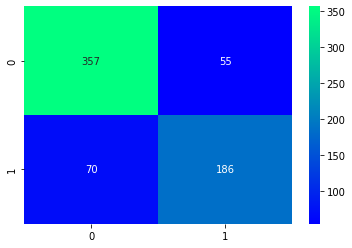

In [98]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

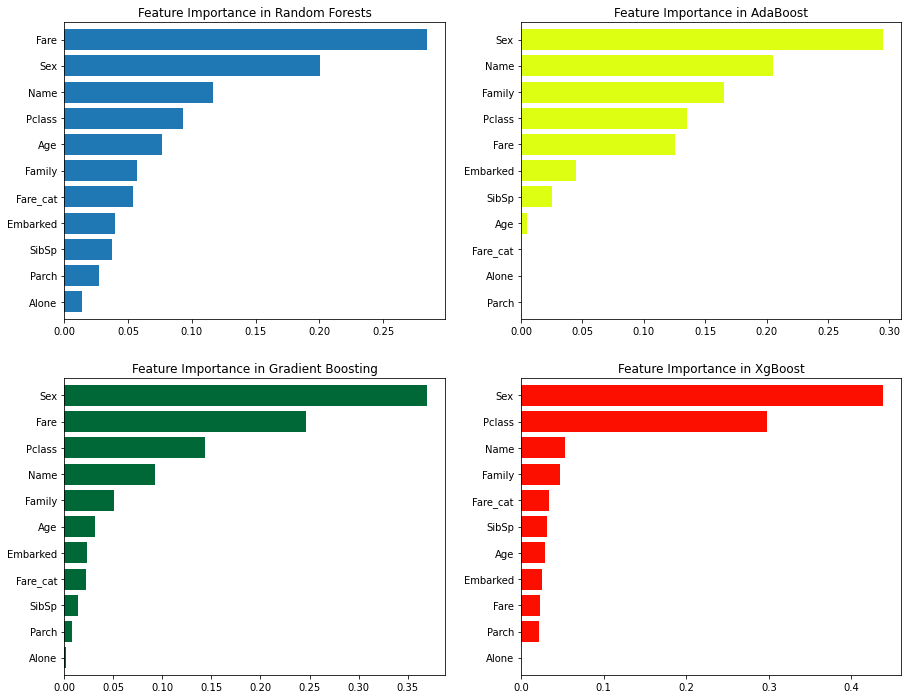

In [101]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(x_train,y_train)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(x_train,y_train)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(x_train,y_train)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(x_train,y_train)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()